In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
offre = pd.read_excel("offre.xlsx")
offre

,Offre,Forfait_Voix,Forfait_Data,Forfait_Sms,Image_Forfait
0,Waffi 60,60,2048,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...
1,Waffi 80,80,7168,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...
2,Waffi 100,100,25600,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...
3,Ehdia Net,20,2560,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...
4,Trankil,10,150,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...
5,EST 1000% New,0,700,0,https://www.leconomistemaghrebin.com/wp-conten...
6,Pass Etudiant,0,200,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...
7,Hadra Net 20,20,2560,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...
8,Hadra Net 10,10,100,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...
9,Hadra Net 15,15,350,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...


In [4]:
offre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Offre          16 non-null     object
 1   Forfait_Voix   16 non-null     int64 
 2   Forfait_Data   16 non-null     int64 
 3   Forfait_Sms    16 non-null     int64 
 4   Image_Forfait  16 non-null     object
dtypes: int64(3), object(2)
memory usage: 768.0+ bytes


Determing the number of clusters

In [6]:
coords = offre[['Forfait_Voix','Forfait_Data']]

distortions=[]
k = range(1,15)
for k in k :
    kmeansModel=KMeans(n_clusters=k).fit(coords)
    distortions.append(kmeansModel.inertia_)

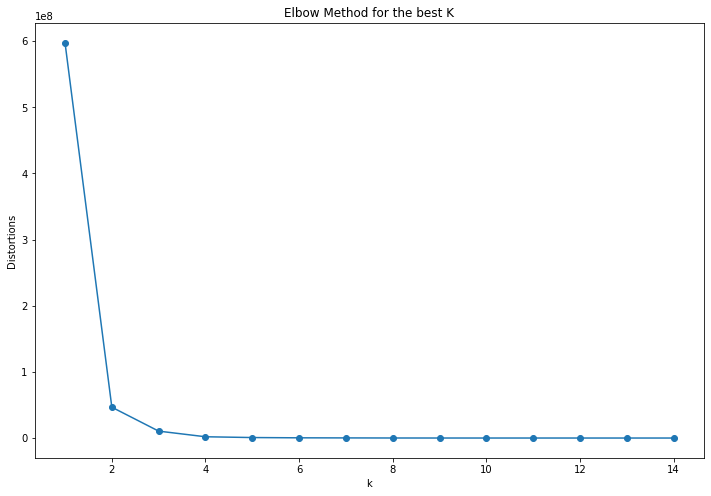

In [7]:
k = range(1,15)
fig ,ax=plt.subplots(figsize=(12,8))
plt.plot(k, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title("Elbow Method for the best K")
plt.show()

Silhoute method

In [8]:
sil = []
kmax =16
#dissimilarity would not be defined for a single cluster,thus, minimum number of cluster is 2
for k in range(2, kmax+1):
    kmeans=KMeans(n_clusters=k).fit(coords)
    labels=kmeans.labels_
    sil.append(silhouette_score(coords,labels,metric="euclidean"))

In [9]:
sil

[0.8671052938701824,
 0.7232641643197838,
 0.6065541664992277,
 0.552917229652623,
 0.5729725188103499,
 0.5998977868086324,
 0.5990833155266905,
 0.5111508228991054,
 0.4890066476298083,
 0.41439043214443616,
 0.3734935798700265,
 0.3692160588943009,
 0.25,
 0.25,
 0.25]

Kmeans Clustering

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y=kmeans.labels_
print("k = 5", " silhouette score",silhouette_score(coords,y,metric="euclidean"))

k = 5  silhouette score 0.552917229652623


In [13]:
offre['cluster']=kmeans.predict(offre[['Forfait_Voix','Forfait_Data']])
offre

,Offre,Forfait_Voix,Forfait_Data,Forfait_Sms,Image_Forfait,cluster
0,Waffi 60,60,2048,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...,0
1,Waffi 80,80,7168,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...,3
2,Waffi 100,100,25600,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...,1
3,Ehdia Net,20,2560,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...,0
4,Trankil,10,150,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...,2
5,EST 1000% New,0,700,0,https://www.leconomistemaghrebin.com/wp-conten...,2
6,Pass Etudiant,0,200,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...,2
7,Hadra Net 20,20,2560,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...,0
8,Hadra Net 10,10,100,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...,2
9,Hadra Net 15,15,350,0,https://www.tunisietelecom.tn/Fr/Lists/Custome...,2


Number of calls And Volume Data Based Recommendation

In [28]:
def recommend (df,nb_appel,volume_data):
    #predict the cluster for number of calls and volume data provided
    cluster=kmeans.predict(np.array([nb_appel,volume_data]).reshape(1,-1))[0]
    return df[df['cluster']==cluster].iloc[0:5][['Offre','Forfait_Voix','Forfait_Data','Image_Forfait']]

recommend(offre,50000,100)

,Offre,Forfait_Voix,Forfait_Data,Image_Forfait
10,Hadra Net 15/1,15,1024,https://www.tunisietelecom.tn/Fr/Lists/Custome...
11,Pack Reussite,0,1024,https://www.webdo.tn/wp-content/uploads/2017/0...
15,Option ++ 100,100,1536,https://www.techno.rn.tn/images/2021/01/01/opt...


In [21]:
import pickle
pickle.dump(kmeans,open('kmeans.pkl','wb'))
pickle.dump(offre,open('offre.pkl','wb'))